# Exploratory Data Analysis

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [9]:
loan = pd.read_csv('datasets\loan_data.csv') 
loan.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [12]:
loan.isna().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [13]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [21]:
cat_columns = loan.select_dtypes(include=['object']).columns
cat_columns

Index(['person_gender', 'person_education', 'person_home_ownership',
       'loan_intent', 'previous_loan_defaults_on_file'],
      dtype='object')

In [22]:
for col in cat_columns:
    unique_values = loan[col].unique()
    print(f"Column: {col}, Unique Values: {unique_values}")

Column: person_gender, Unique Values: ['female' 'male']
Column: person_education, Unique Values: ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
Column: person_home_ownership, Unique Values: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
Column: loan_intent, Unique Values: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
Column: previous_loan_defaults_on_file, Unique Values: ['No' 'Yes']


In [ ]:
#Label Encoding for categorical variables of 2 unique values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
loan['person_gender'] = le.fit_transform(loan['person_gender'])
loan['previous_loan_defaults_on_file'] = le.fit_transform(loan['previous_loan_defaults_on_file'])

In [47]:
numeric_columns = loan.select_dtypes(include=['number']).columns
numeric_columns

Index(['person_age', 'person_gender', 'person_income', 'person_emp_exp',
       'loan_amnt', 'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length', 'credit_score',
       'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [45]:
discrete_cols = loan[['person_age', 'person_gender','person_emp_exp','previous_loan_defaults_on_file']]
continuous_cols = loan[['person_income','loan_amnt', 'loan_int_rate','loan_percent_income','cb_person_cred_hist_length','credit_score']]
continuous_cols

,person_income,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score
0,71948.0,35000.0,16.02,0.49,3.0,561
1,12282.0,1000.0,11.14,0.08,2.0,504
2,12438.0,5500.0,12.87,0.44,3.0,635
3,79753.0,35000.0,15.23,0.44,2.0,675
4,66135.0,35000.0,14.27,0.53,4.0,586
...,...,...,...,...,...,...
44995,47971.0,15000.0,15.66,0.31,3.0,645
44996,65800.0,9000.0,14.07,0.14,11.0,621
44997,56942.0,2771.0,10.02,0.05,10.0,668
44998,33164.0,12000.0,13.23,0.36,6.0,604


In [55]:
#Visualizing the relationship of numeric variables with the target variable using bar plots
# for col in numeric_columns:
#     plt.figure(figsize=(10, 6))
#     sns.histplot(data=loan, x=col, hue='loan_status', kde=True, element='step')
#     plt.title(f'Distribution of {col} by Loan Status')
#     plt.show()

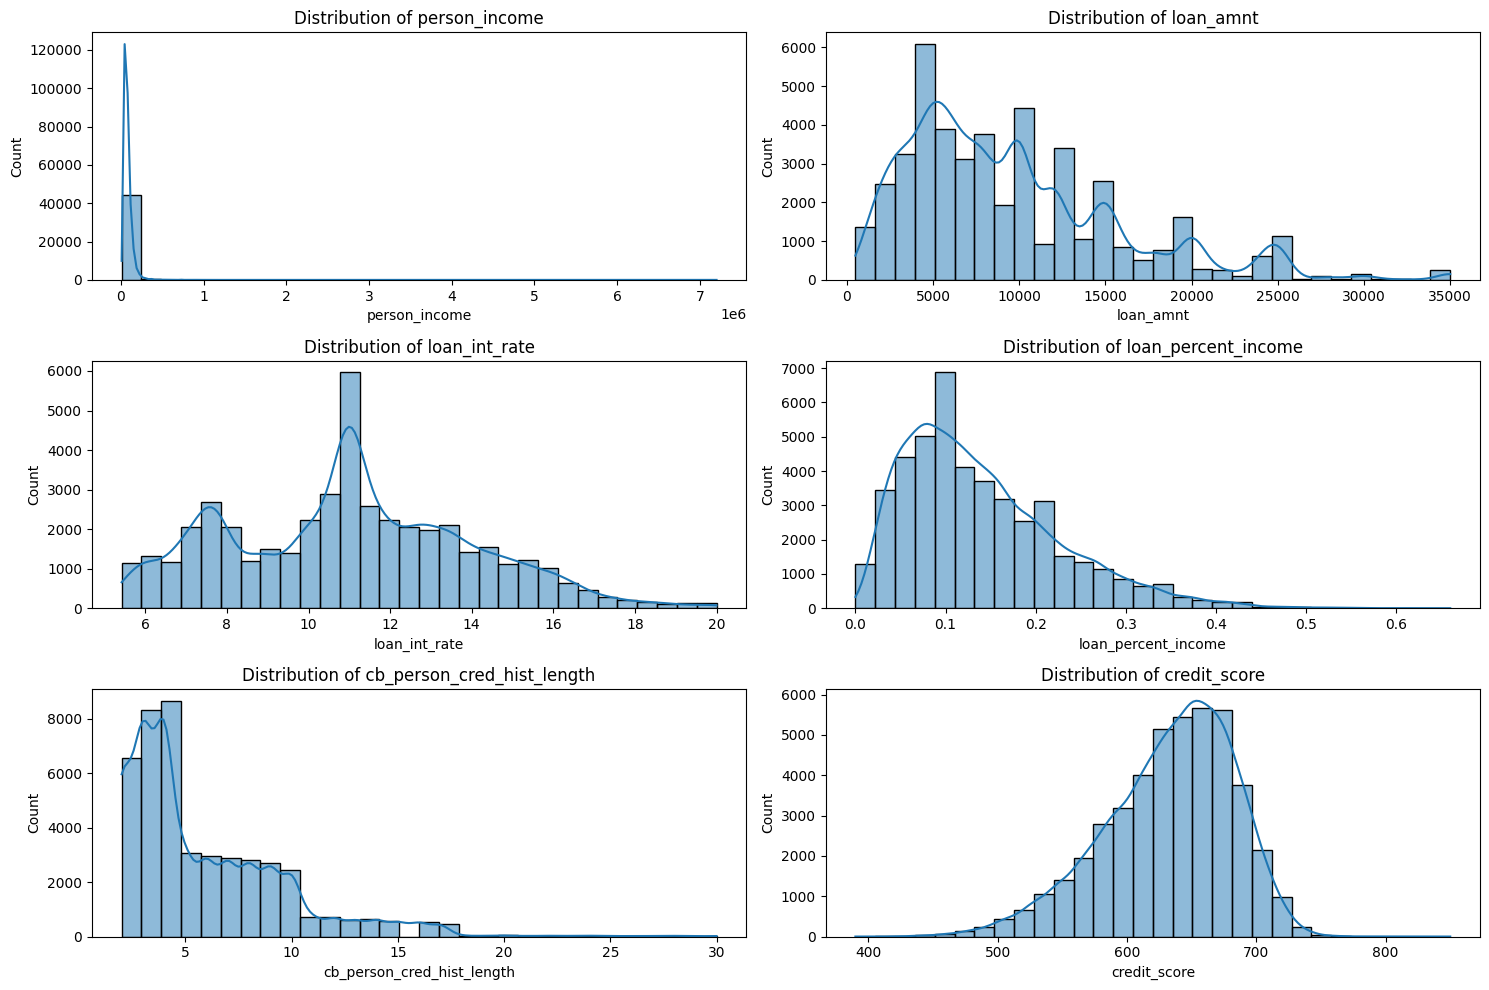

In [56]:
# Visualizing the distribution of continuous variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(continuous_cols.columns):
    plt.subplot(3, 2, i + 1)
    sns.histplot(loan[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()


In [61]:
#ranges of continuous variables
ranges = {}
for col in continuous_cols.columns:
    min_val = loan[col].min()
    max_val = loan[col].max()
    ranges[col] = (min_val, max_val)
ranges

{'person_income': (8000.0, 7200766.0),
 'loan_amnt': (500.0, 35000.0),
 'loan_int_rate': (5.42, 20.0),
 'loan_percent_income': (0.0, 0.66),
 'cb_person_cred_hist_length': (2.0, 30.0),
 'credit_score': (390, 850)}

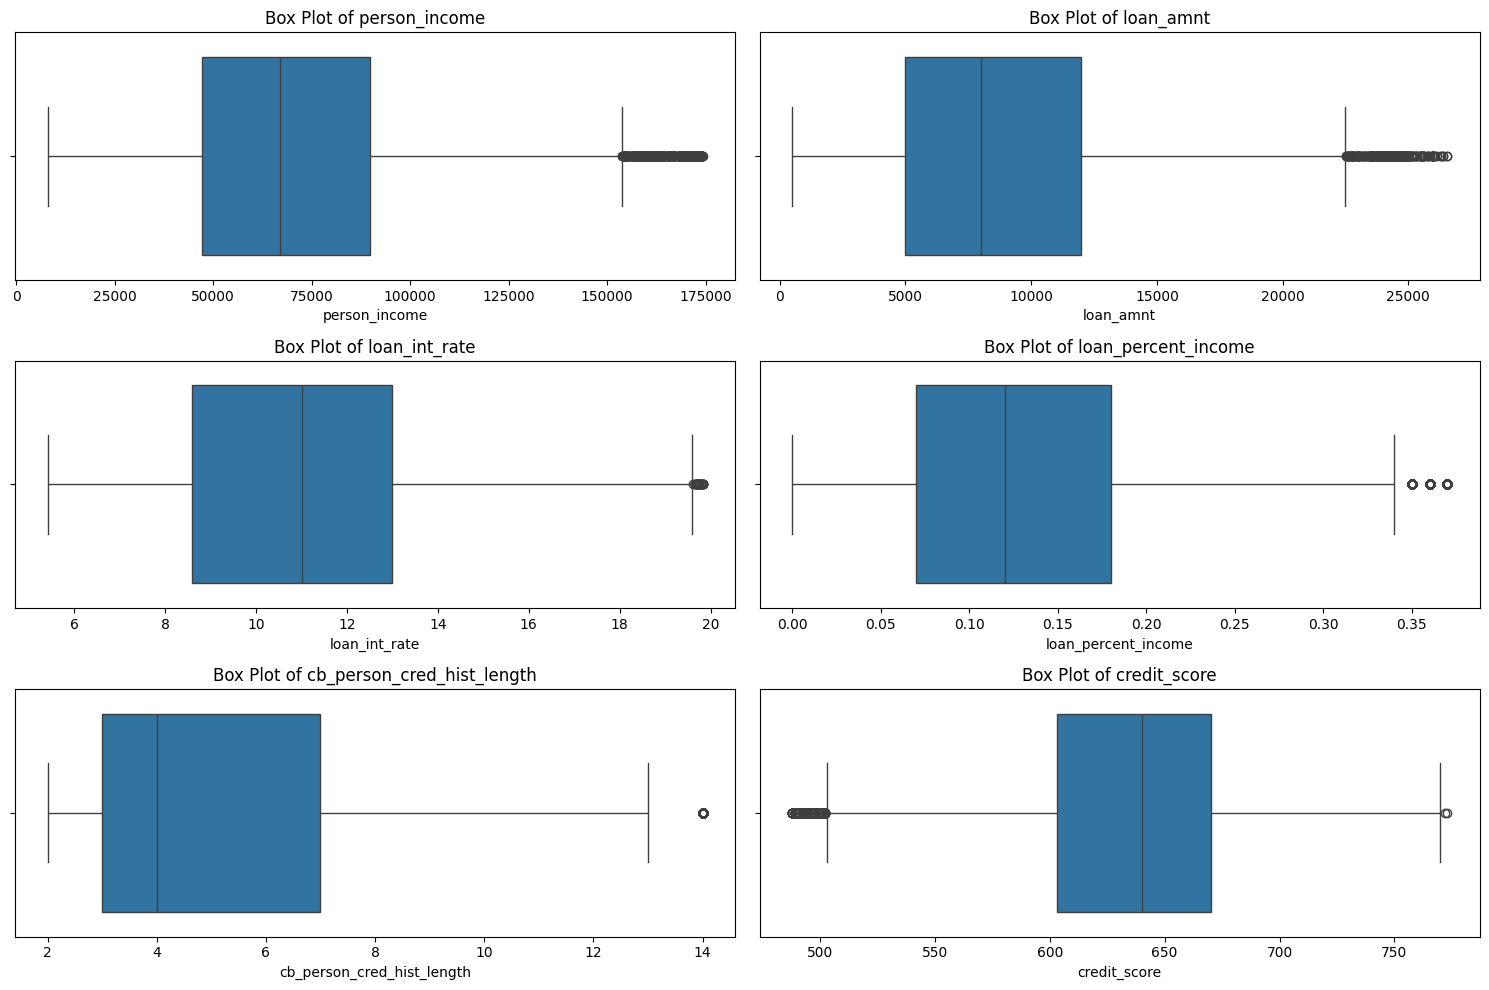

In [73]:
#visualizing Outliers in continuous variables using box plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(continuous_cols.columns):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x=loan[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()

In [72]:
from scipy import stats
import numpy as np

for col in continuous_cols.columns:
    # Calculate z-scores
    z_scores = np.abs(stats.zscore(loan[col]))
    
    # Create boolean mask of outliers (more efficient than np.where)
    outlier_mask = z_scores > 3
    
    # Print how many outliers found
    print(f"Column '{col}': {outlier_mask.sum()} outliers detected")
    
    # Replace outliers with median using boolean mask
    loan.loc[outlier_mask, col] = loan[col].median()
    
    # Verify replacement
    print(f"New max/min for {col}: {loan[col].max()}, {loan[col].min()}")

Column 'person_income': 368 outliers detected
New max/min for person_income: 174237.0, 8000.0
Column 'loan_amnt': 0 outliers detected
New max/min for loan_amnt: 26550.0, 500.0
Column 'loan_int_rate': 0 outliers detected
New max/min for loan_int_rate: 19.82, 5.42
Column 'loan_percent_income': 0 outliers detected
New max/min for loan_percent_income: 0.37, 0.0
Column 'cb_person_cred_hist_length': 557 outliers detected
New max/min for cb_person_cred_hist_length: 14.0, 2.0
Column 'credit_score': 0 outliers detected
New max/min for credit_score: 773.0, 488.0


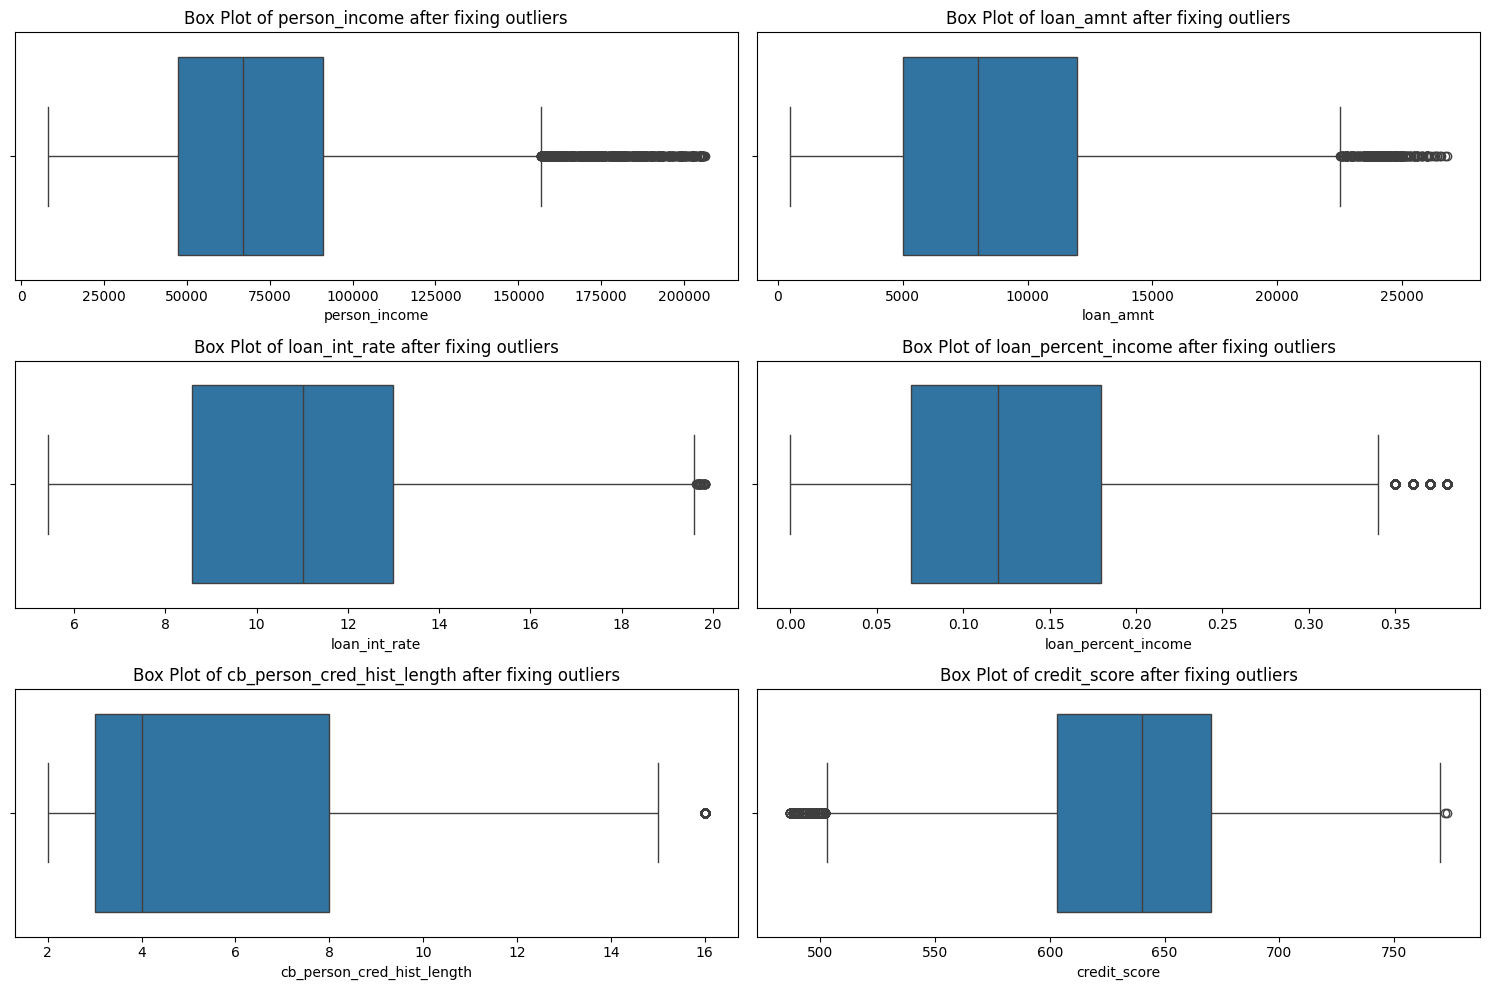

In [69]:
#visualizing Outliers in continuous variables after fixing using box plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(continuous_cols.columns):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x=loan[col])
    plt.title(f'Box Plot of {col} after fixing outliers')
plt.tight_layout()
